In [1]:
""" 
    =================================================
    Make a 3D plot from given address in the Flanders
    =================================================
"""

' \n    =================================================\n    Make a 3D plot from given address in the Flanders\n    =================================================\n'

In [4]:
""" Import the necessary modules """
import pandas as pd
import geopandas as gpd
import time

import requests
from tkinter import *
#import tkinter as Tk

In [5]:
""" Ask for an address with Tkinter input box """
# Antwerpsestraat 165 2640 Antwerpen
# address = input("What address did you have in mind? ")
window = Tk()
window.title("What adddress do you want a 3D plot from?")
window.geometry('400x250+500+300')
window.config(bg="#9FD996")

lbl = Label(window, text="Street")
lbl.grid(column=0, row=0)
street = Entry(window,width=30)
street.grid(column=1, row=0)

lbl = Label(window, text="Number")
lbl.grid(column=0, row=1)
number = Entry(window,width=5)
number.grid(column=1, row=1)

lbl = Label(window, text="Postal Code")
lbl.grid(column=0, row=2)
postal_code = Entry(window,width=4)
postal_code.grid(column=1, row=2)

lbl = Label(window, text="City")
lbl.grid(column=0, row=3)
city = Entry(window,width=20)
city.grid(column=1, row=3)

def clicked():
    # Check whether this address can be found in the address list of Flanders
    url = f"https://loc.geopunt.be/v4/Location?q={street}%20{number},%20{postal_code}%20{city}"
    data = requests.get(url).json()
    print(url)
    print(data)
    window.destroy()

btn = Button(window, text="Request details", command=clicked)
btn.grid(column=1, row=6)

window.mainloop()

data


https://loc.geopunt.be/v4/Location?q=.!entry%20.!entry2,%20.!entry3%20.!entry4
{'LocationResult': []}


NameError: name 'data' is not defined

In [ ]:
""" Find the DSM & DTM zip files that contains the given address """

In [6]:
# Get the file where all the maps boundary coordinations are
# this helps visualisation the x and y coordinates
df = pd.read_csv("./data/tif_card_bounderies.csv")

In [46]:
df

,DSM Files,xLeft,yBottom,xRight,yTop
0,DSM_1,145000.0,238000.0,162000.0,247000.0
1,DSM_2,162000.0,238000.0,194000.0,250000.0
2,DSM_3,194000.0,238000.0,206000.0,248000.0
3,DSM_4,53000.0,218000.0,66000.0,225500.0
4,DSM_5,66000.0,218000.0,98000.0,232000.0
5,DSM_6,98000.0,218000.0,130000.0,227000.0
6,DSM_7,130000.0,218000.0,162000.0,238000.0
7,DSM_8,162000.0,218000.0,194000.0,238000.0
8,DSM_9,194000.0,218000.0,226000.0,238000.0
9,DSM_10,226000.0,218000.0,238000.0,227000.0


In [48]:
# This data comes from a random address
""" ### x, y from -a- address ###
"""
"""
 'x_value': 153908.9,
 'y_value': 212660.38
"""


""" ### polygon from -a- address ###
"""
"""
 'polygon': [{'coordinates': [[[153913.09697395563, 212652.07560559362],
     [153909.20398195833, 212669.40699760243],
     [153904.5820299536, 212668.39899760485],
     [153907.5011979565, 212656.54043759406],
     [153908.57345395535, 212652.1845335923],
     [153908.816653952, 212651.1965655908],
     [153909.12673395127, 212651.2602455914],
     [153913.09697395563, 212652.07560559362]]],
   'type': 'Polygon'}]}
"""

"\n 'polygon': [{'coordinates': [[[153913.09697395563, 212652.07560559362],\n     [153909.20398195833, 212669.40699760243],\n     [153904.5820299536, 212668.39899760485],\n     [153907.5011979565, 212656.54043759406],\n     [153908.57345395535, 212652.1845335923],\n     [153908.816653952, 212651.1965655908],\n     [153909.12673395127, 212651.2602455914],\n     [153913.09697395563, 212652.07560559362]]],\n   'type': 'Polygon'}]}\n"

In [9]:
""" Download the DSM & DTM zip files """

' Download the DSM & DTM zip files '

In [101]:
### FIRST UNDERSTAND THE DATA

#find_map_df = find_map_df.assingn...
# ADD CONDITIONS TO THE NEW COLUMNS

### figure out how the files are ordered to 
### enable to find the right box in the matrix
x = data['LocationResult'][0]['Location']['X_Lambert72']
y = data['LocationResult'][0]['Location']['Y_Lambert72']

find_tif_df = df[["DSM Files", "xLeft", "xRight", "yBottom", "yTop"]]

for i in range(0, 43):
    if find_tif_df['xLeft'][i] <= x:
        if find_tif_df['xRight'][i] >= x:
            if find_tif_df['yBottom'][i] <= y:
                if find_tif_df['yTop'][i] >= y:
                    i = i
                    break

if i < 9:
    num = f'k0{i+1}'
else:
    num = f'k{i+1}' 
num
    

154972.19 207166.52


'k15'

In [72]:
import tkinter



#btn = Button(window, text="Request details", command=window.destroy)
#btn.grid(column=1, row=6)


root=Tk()
root.geometry("1000x700+200+100")


# place the buttons accordingly their x and y value that make the cover the
# whole map of Vlaanderen
# It looks like the map is upside down ....................
for i in range(0, 43):  
    b = f"b{i+1}"
    btn = Button(root, text=f"b{str(i)}")

    x = (find_tif_df.at[i, "xLeft"]/1000)
    y = (find_tif_df.at[i, "yBottom"]/1000)
    
    btn.place_configure(x=x,y=y)

# a copy of the buttons are now placed in a column together with their coordinates
x, y = 330, 1
v, w = 1, 14
for i in range(1, 4):    
    for j in range(v, w):  
        b = f"b{j+1}"
        btn = Button(root, text=f"b{str(j)}")
        y += 45
        btn.place_configure(x=x,y=y)
    x += 200
    y = 1
    v += 14
    w += 14
# 2 buttons are missing: b42 and B43   
root.mainloop()

<AxesSubplot:xlabel='xLeft', ylabel='yBottom'>

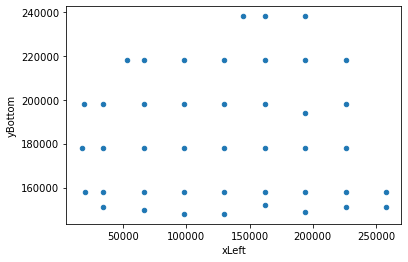

In [66]:
find_tif_df.plot(x="xLeft", y="yBottom", kind='scatter')





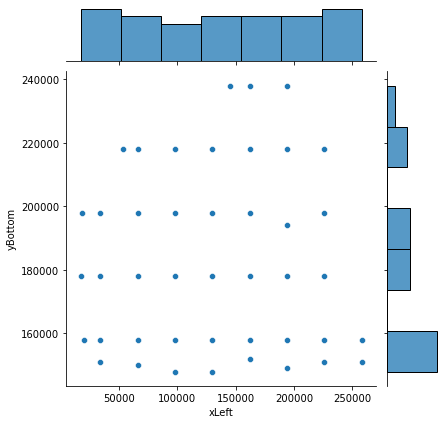

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# x and y are from the actual find_tif_df DataFrame
addr_xy = 
 'x_value': 153908.9,
 'y_value': 212660.38
sns.jointplot(x=find_tif_df.xLeft, y=find_tif_df.yBottom, data=find_tif_df)




In [12]:
# OR work with code that stores data files temporarily

In [13]:
# OR write a code that opens it remotely and gathers the data needed

In [14]:
""" Get data from the address that's needed for the plot
    ----------------------------------------------------
"""

" Get data from the address that's needed for the plot\n    ----------------------------------------------------\n"

In [15]:
""" Check the files like .scp, .. to find usefull data """

' Check the files like .scp, .. to find usefull data '

In [16]:
# check the internet what files contain the plot data

In [17]:
# Assign the polygon coordinates to a list variable

In [18]:
# Calculate the CHM like DSM - DTM

In [19]:
# Prepare the plot

In [20]:
# Create the plot